In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [7]:
# network size N
N = 5000

# number of edges
M = N*30

## initialize time
T = 0
## choose Tmax
Tmax = 1000


In [13]:
def find_extinction_time(b, E):

    ## find the number of events that occur in the interval from T = 0 to T = Tmax
    n = np.random.poisson(lam = Tmax*(N+b*M))

    ## find times for all events
    times = np.sort(np.random.uniform(0, Tmax, n))

    ## start out with all infectious individuals
    X = np.ones(N, dtype = int)

    ## initialize number infected (all infected)
    I = N

    ## initialize list of infected people for all timesteps
    infected = np.zeros(n)

    # run simulation
    for t in range(n):

        if np.random.random() < N/(N + b*M):

            i = np.random.randint(N)

            I -= X[i]

            X[i] = 0

        else:

            i,j = E[np.random.randint(M)]

            I += X[i] ^ X[j]

            X[i] = X[j] = (X[i] or X[j])
    
        infected[t] = I

        ## if zero infected people, break simulation, truncate infected array
        if I == 0:

            infected = infected[:t]

            break

    ## return extinction time, if there is no extinction time, the time returned will be Tmax
    return times[len(infected)- 1]

def variance_in_extinction_time_simulation(b_array, E):

    variances = np.zeros(len(b_array))

    for i, b in zip(np.arange(0, len(b_array), dtype = int), b_array):

        extinction_times = []

        if round(find_extinction_time(b, E)) == Tmax:
            
            ## just slightly greater than 0 to avoid errors in the log scale 
            variances[i] = 0.000001
        
        else:
        
            for t in range(20):

                extinction_times.append(find_extinction_time(b, E))

            variances[i] = np.var(extinction_times)
        
        print(variances[i])
    
    return variances


Make a new plot of variance/ extinction times now.

In [10]:
def find_extinction_time(b, E):

    ## find the number of events that occur in the interval from T = 0 to T = Tmax
    n = np.random.poisson(lam = Tmax*(N+b*M))

    ## find times for all events
    times = np.sort(np.random.uniform(0, Tmax, n))

    ## start out with all infectious individuals
    X = np.ones(N, dtype = int)

    ## initialize number infected (all infected)
    I = N

    ## initialize list of infected people for all timesteps
    infected = np.zeros(n)

    # run simulation
    for t in range(n):

        if np.random.random() < N/(N + b*M):

            i = np.random.randint(N)

            I -= X[i]

            X[i] = 0

        else:

            i,j = E[np.random.randint(M)]

            I += X[i] ^ X[j]

            X[i] = X[j] = (X[i] or X[j])
    
        infected[t] = I

        ## if zero infected people, break simulation, truncate infected array
        if I == 0:

            infected = infected[:t]

            break

    ## return extinction time, if there is no extinction time, the time returned will be Tmax
    return times[len(infected)- 1]

def variance_in_extinction_time_simulation(b_array, E):

    variances = np.zeros(len(b_array))
    times = np.zeros(len(b_array))
    to_plot = []

    for i, b in zip(np.arange(0, len(b_array), dtype = int), b_array):

        extinction_times = []

        if round(find_extinction_time(b, E)) == Tmax:
            
            ## just slightly greater than 0 to avoid errors in the log scale 
            variances[i] = 0.000001
            times[i] = Tmax
        
        else:
        
            for t in range(20):

                extinction_times.append(find_extinction_time(b, E))

            variances[i] = np.var(extinction_times)
            times[i] = np.average(extinction_times)
        
        print(times[i], variances[i])
        to_plot.append([times[i], variances[i]])
    
    return to_plot


In [11]:
b_array = np.linspace(0, 0.020, 20)

## random edge matrix
E = np.random.randint(0,N,size=2*M).reshape((N*30, 2))


uniform_variances = variance_in_extinction_time_simulation(b_array, E)
print(uniform_variances)


9.150187709674112 1.8966863656144706
10.361563710001404 4.159901797588801
10.28801298390747 4.0151635652370015
10.843674492342405 2.021266695718521
11.304420373603396 2.890391882850905
11.794234412020622 2.5845525371036886
12.391190135505536 1.9999165848592675
13.051080129563942 3.001346137542744
15.674608150659234 8.623677638789246
18.10778259703914 14.951972766399177
18.796810874539283 7.99067650857612
21.208226265033122 9.462365365968868
26.110503278963883 12.69420560479967
34.08876030993365 36.927242913789726
41.557119994792195 100.02093975497309
66.1857386301751 275.7086154385312
179.1159303925255 9168.378408674938
1000.0 1e-06
1000.0 1e-06
1000.0 1e-06
[[9.150187709674112, 1.8966863656144706], [10.361563710001404, 4.159901797588801], [10.28801298390747, 4.0151635652370015], [10.843674492342405, 2.021266695718521], [11.304420373603396, 2.890391882850905], [11.794234412020622, 2.5845525371036886], [12.391190135505536, 1.9999165848592675], [13.051080129563942, 3.001346137542744], [1

In [3]:
uniform_variances = [1.5108701773743594,
1.4697771068661987,
2.0931107316297886,
0.6008733420313179,
1.4631362786881197,
3.2089970975566344,
13.452980653682095,
7.415530527465933,
1.9597117442511274,
2.9574160280764312,
4.355975458505973,
5.991524451043781,
11.351404281536063,
40.401327275296175,
46.545440395389726,
54.29399570824487,
147.40814257089,
532.7375400998123,
31600.693118337764,
0.0001]

b_array = np.linspace(0, 0.020, 20)


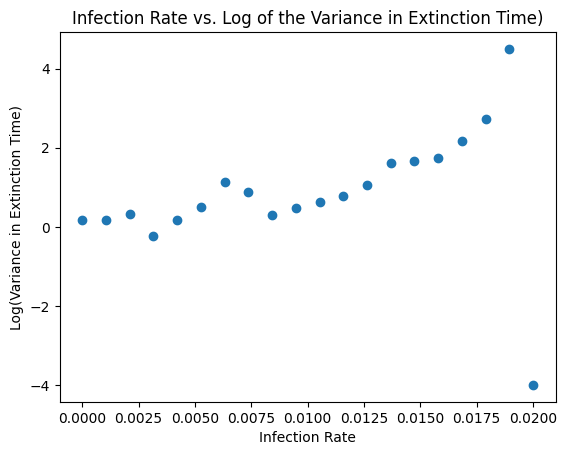

In [4]:
import matplotlib.pyplot as plt
plt.scatter(b_array, np.log10(uniform_variances))
plt.title('Infection Rate vs. Log of the Variance in Extinction Time)')
plt.ylabel('Log(Variance in Extinction Time)')
plt.xlabel('Infection Rate')
plt.show()


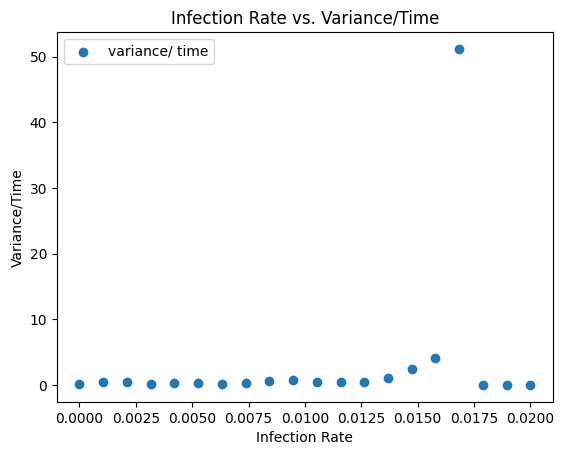

In [19]:
# Assuming the list of lists is defined as follows:
time_variance = [[9.150187709674112, 1.8966863656144706], [10.361563710001404, 4.159901797588801], [10.28801298390747, 4.0151635652370015], [10.843674492342405, 2.021266695718521], [11.304420373603396, 2.890391882850905], [11.794234412020622, 2.5845525371036886], [12.391190135505536, 1.9999165848592675], [13.051080129563942, 3.001346137542744], [15.674608150659234, 8.623677638789246], [18.10778259703914, 14.951972766399177], [18.796810874539283, 7.99067650857612], [21.208226265033122, 9.462365365968868], [26.110503278963883, 12.69420560479967], [34.08876030993365, 36.927242913789726], [41.557119994792195, 100.02093975497309], [66.1857386301751, 275.7086154385312], [179.1159303925255, 9168.378408674938], [1000.0, 1e-06], [1000.0, 1e-06], [1000.0, 1e-06]]

# We can use a list comprehension to divide the second element by the first element for each list
variance_divided_by_time = [lst[1]/lst[0] for lst in time_variance]
std_divided_by_time = [lst[1]**0.5/lst[0] for lst in time_variance]

plt.scatter(b_array, variance_divided_by_time, label = 'variance/ time')
plt.legend()
plt.title('Infection Rate vs. Variance/Time')
plt.ylabel('Variance/Time')
plt.xlabel('Infection Rate')
plt.show()


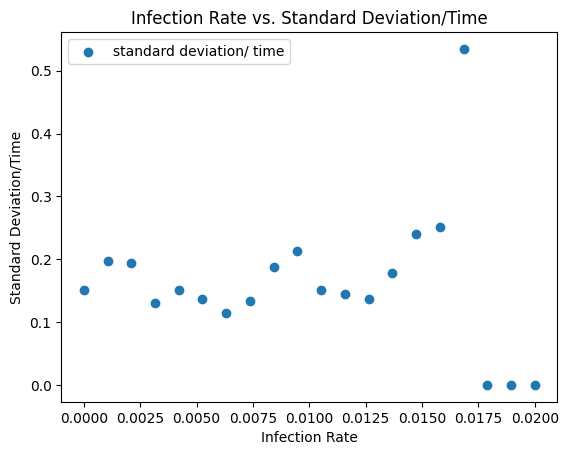

In [20]:

plt.scatter(b_array, std_divided_by_time, label = 'standard deviation/ time')
plt.legend()
plt.title('Infection Rate vs. Standard Deviation/Time')
plt.ylabel('Standard Deviation/Time')
plt.xlabel('Infection Rate')
plt.show()
